In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# description of the dataset

This dataset contains revies of 1311 arabica coffee beans from the Coffee Quality Institute's trained reviewers.

Features include:

Feature of Species: \
> Species

Features from sample information:
> Owner \
> Country of Origin \
> Farm Name \
> Lot Number \
> Mill \
> ICO Number \
> Company \
> Altitude \
> unit_of_measurement \
> altitude_low_meters \
> altitude_high_meters \
> altitude_mean_meters \
> Region \
> Producer \
> Number of Bags \
> Bag Weight \
> In Country Partner \
> Harvest Year \
> Grading Date \
> Owner_1 \
> Variety \
> Processing Method

Features from cupping scores: 
> Aroma  
> Flavor  
> Aftertaste  
> Acidity  
> Body  
> Balance  
> Uniformity  
> Cup Cleanliness  
> Sweetness   
> Cupper Points  
> Total Cup Points

Features from Green Analysis: 
> Moisture \
> Category One Defects \
> Quakers \
> Color \
> Category Two Defects

Features from Certification Information: 
> Expiration \
> Certification Body \
> Certification Address \
> Certification Contact 


Quality Measures:
> Aroma  
> Flavor  
> Aftertaste  
> Acidity  
> Body  
> Balance  
> Uniformity  
> Cup Cleanliness  
> Sweetness  
> Moisture  
> Defects  

Bean Metadata:
> Processing method  
> Color  
> Species  


Farm Metadata:
> Owner  
> Country of Origin  
> Farm Name  
> Lot Number  
> Mill  
> Company  
> Altitude  
> Region  

# EDA performance

In [28]:
coffee_data = 'data/arabica_data_cleaned.csv'

cf = pd.read_csv(coffee_data)
cf = cf.iloc[:, 1:] # ship the number column

In [39]:
print(cf.shape)
cf.head()

(1311, 43)


,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


columns in the dataset

In [40]:
cf.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

overall information of the dataset

In [42]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1311 non-null   object 
 1   Owner                  1304 non-null   object 
 2   Country.of.Origin      1310 non-null   object 
 3   Farm.Name              955 non-null    object 
 4   Lot.Number             270 non-null    object 
 5   Mill                   1001 non-null   object 
 6   ICO.Number             1165 non-null   object 
 7   Company                1102 non-null   object 
 8   Altitude               1088 non-null   object 
 9   Region                 1254 non-null   object 
 10  Producer               1081 non-null   object 
 11  Number.of.Bags         1311 non-null   int64  
 12  Bag.Weight             1311 non-null   object 
 13  In.Country.Partner     1311 non-null   object 
 14  Harvest.Year           1264 non-null   object 
 15  Grad

From here on, I will perfom EDA on each column.

In [50]:
# for each column we perform describe
for col in cf.columns:
    print(f'cf[\'{col}\'].describe()')
    print(cf[col].describe())
    print()

cf['Species'].describe()
count        1311
unique          1
top       Arabica
freq         1311
Name: Species, dtype: object

cf['Owner'].describe()
count                          1304
unique                          305
top       juan luis alvarado romero
freq                            155
Name: Owner, dtype: object

cf['Country.of.Origin'].describe()
count       1310
unique        36
top       Mexico
freq         236
Name: Country.of.Origin, dtype: object

cf['Farm.Name'].describe()
count         955
unique        557
top       various
freq           47
Name: Farm.Name, dtype: object

cf['Lot.Number'].describe()
count     270
unique    221
top         1
freq       18
Name: Lot.Number, dtype: object

cf['Mill'].describe()
count                 1001
unique                 447
top       beneficio ixchel
freq                    90
Name: Mill, dtype: object

cf['ICO.Number'].describe()
count     1165
unique     841
top          0
freq        67
Name: ICO.Number, dtype: object

cf['Compa

Similarly, we can perform value counts for each row, but in order to save some space and memory (the jupyter notebook page becomes extremely stucked after I run all of them).
I just print out the value counts info for several features.

In [18]:
cf['Harvest.Year'].value_counts()

2012                        352
2014                        226
2013                        170
2015                        125
2016                        122
2017                         68
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                       1
Spring 2

In [52]:
cf['Total.Cup.Points'].value_counts()

83.17    38
83.00    37
82.42    31
82.75    29
82.33    29
         ..
77.00     1
76.83     1
76.75     1
76.50     1
0.00      1
Name: Total.Cup.Points, Length: 178, dtype: int64

calculate the null value rate of each features

In [32]:
cf['Owner'][cf['Owner'].isnull() == True]

364     NaN
459     NaN
602     NaN
848     NaN
882     NaN
975     NaN
1044    NaN
Name: Owner, dtype: object

In [30]:
null_columns = [[], []]
for column in cf.columns:
    print('~~~~~~')
    nullrate = cf[column][cf[column].isnull() == True].shape[0]/cf[column].shape[0]
    print(f'the null rate for column: {column} is: {nullrate}')
    if nullrate != 0:
        null_columns[0].append(column)
        null_columns[1].append(nullrate)

~~~~~~
the null rate for column: Species is: 0.0
~~~~~~
the null rate for column: Owner is: 0.005339435545385202
~~~~~~
the null rate for column: Country.of.Origin is: 0.0007627765064836003
~~~~~~
the null rate for column: Farm.Name is: 0.2715484363081617
~~~~~~
the null rate for column: Lot.Number is: 0.7940503432494279
~~~~~~
the null rate for column: Mill is: 0.23646071700991608
~~~~~~
the null rate for column: ICO.Number is: 0.11136536994660565
~~~~~~
the null rate for column: Company is: 0.15942028985507245
~~~~~~
the null rate for column: Altitude is: 0.17009916094584288
~~~~~~
the null rate for column: Region is: 0.043478260869565216
~~~~~~
the null rate for column: Producer is: 0.17543859649122806
~~~~~~
the null rate for column: Number.of.Bags is: 0.0
~~~~~~
the null rate for column: Bag.Weight is: 0.0
~~~~~~
the null rate for column: In.Country.Partner is: 0.0
~~~~~~
the null rate for column: Harvest.Year is: 0.03585049580472922
~~~~~~
the null rate for column: Grading.Date i

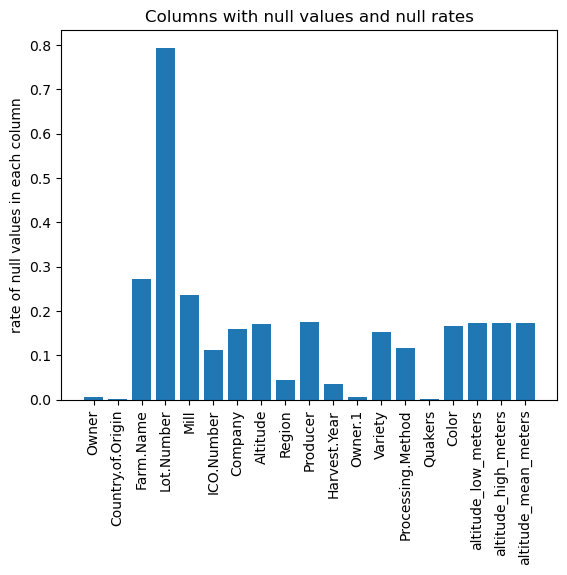

In [38]:

plt.bar(null_columns[0], null_columns[1])
plt.title('Columns with null values and null rates')
plt.ylabel('rate of null values in each column')
plt.xticks(null_columns[0], rotation=90)

plt.savefig('figure/NullValueRateAllFeatures.jpg')

analyzing the target feature -- total cup points

In [59]:
np.log(cf['Total.Cup.Points'].unique().shape[0])

5.181783550292085

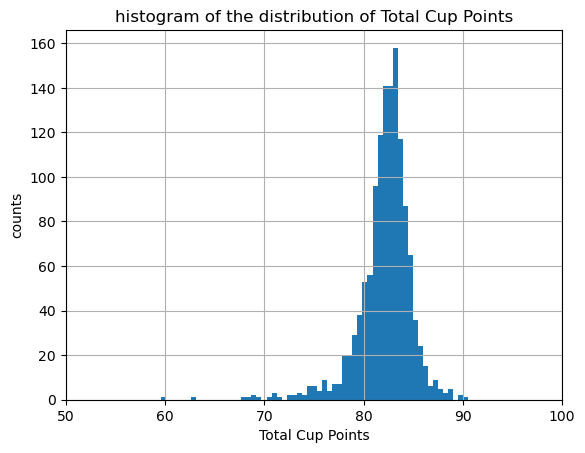

In [66]:
cf['Total.Cup.Points'].hist(bins=(cf['Total.Cup.Points'].unique().shape[0]))
plt.title('histogram of the distribution of Total Cup Points')
plt.xlabel('Total Cup Points')
plt.ylabel('counts')
plt.xlim([50, 100])
plt.savefig('figure/HistDistributionTotalCupPoints.jpg')

We find out that records in the dataset uses two different metric for the measurement of altitude. Later we will convert the altitude data of those with feet as their unit of measurement to the corresponding value in metric of meters.

In [67]:
cf['unit_of_measurement'].value_counts()

m     1129
ft     182
Name: unit_of_measurement, dtype: int64

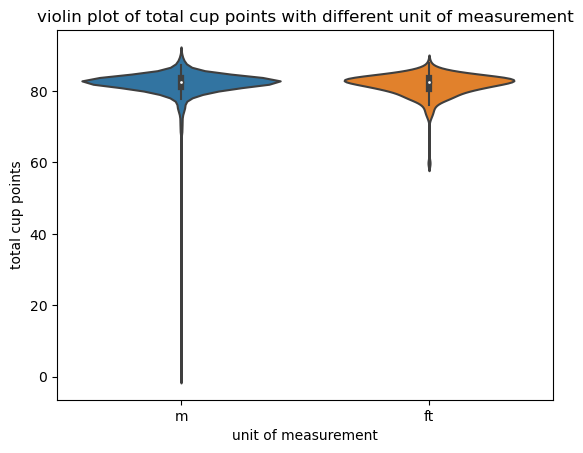

In [70]:
sb.violinplot(data= cf, x= 'unit_of_measurement', y= "Total.Cup.Points")
plt.title('violin plot of total cup points with different unit of measurement')
plt.xlabel('unit of measurement')
plt.ylabel('total cup points')
plt.savefig('figure/ViolinUnitOfMeasurement.jpg')

In [82]:
cf['Variety'].value_counts()

Caturra                  256
Bourbon                  226
Typica                   211
Other                    108
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     5
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Blue Mountain              2
Ethiopian Yirgacheffe      2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: Variety, dtype: int64

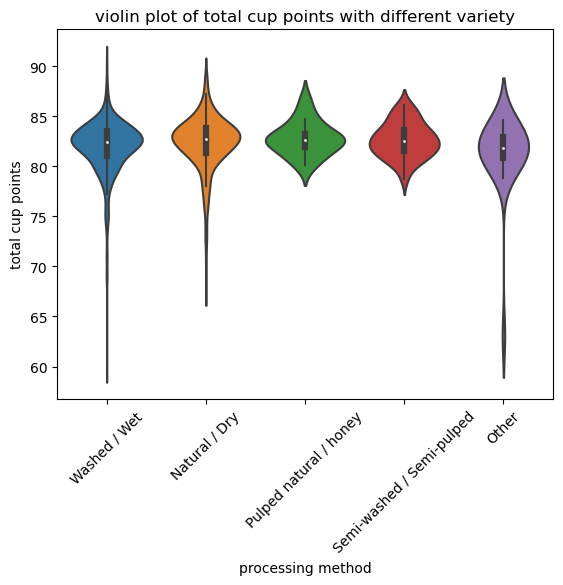

In [100]:
sb.violinplot(data= cf, x= 'Processing.Method', y= "Total.Cup.Points")
plt.title('violin plot of total cup points with different variety')
plt.xticks(rotation=45)
plt.xlabel('processing method')
plt.ylabel('total cup points')
plt.savefig('figure/ViolinProcessingMethod.jpg')

In [101]:
cf['Processing.Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

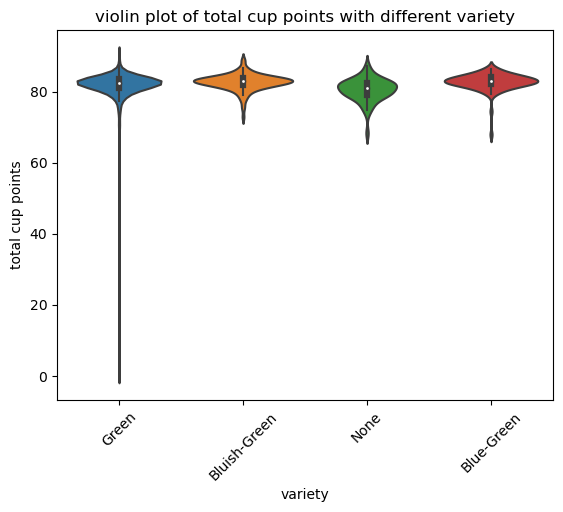

In [86]:
sb.violinplot(data= cf, x= 'Color', y= "Total.Cup.Points")
plt.title('violin plot of total cup points with different variety')
plt.xticks(rotation=45)
plt.xlabel('variety')
plt.ylabel('total cup points')
plt.savefig('figure/ViolinColor.jpg')

here we decided to draw pairplot in the score features. In order to constrain the size of the plot, we only visualize certain features, which are aroma, aftertaste, acidity and total cup points.

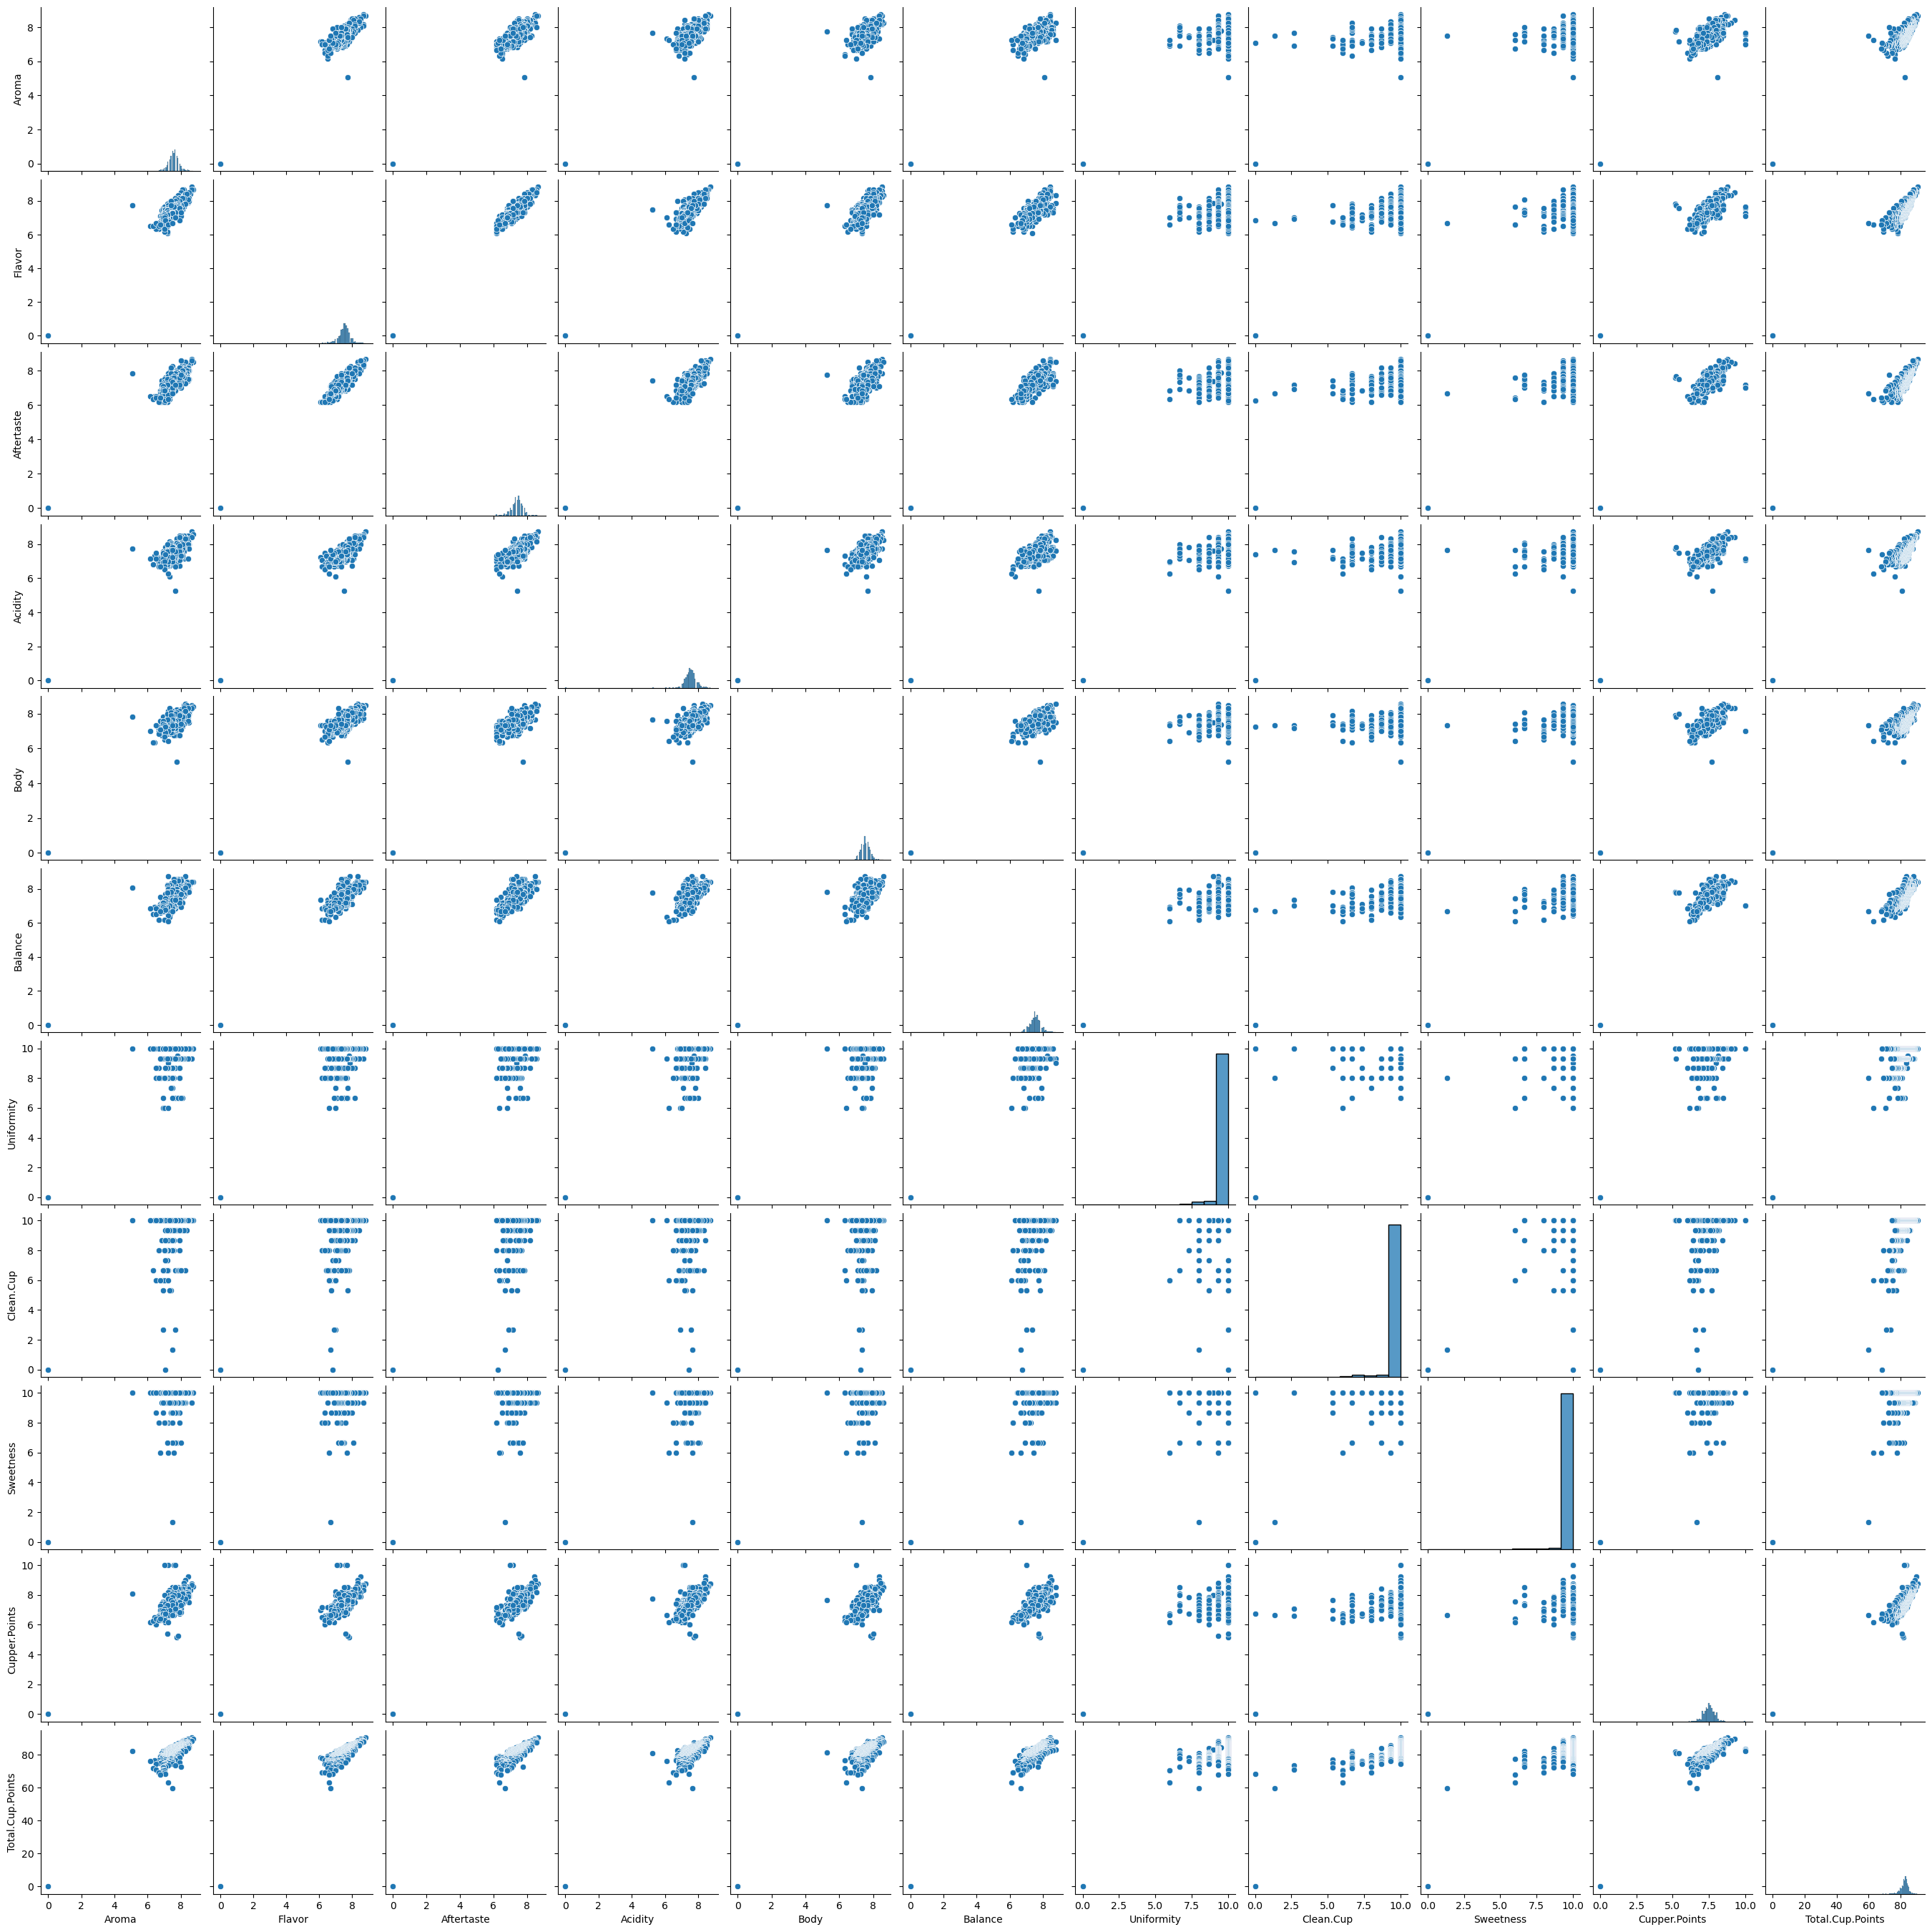

In [102]:
score_data = ['Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points']
sb.pairplot(data=cf[score_data])
plt.savefig('figure/AllPairPlots.jpg')

In the graph we can see that there's one data with all scores being 0. we print it out in the block below.

In [98]:
scores = ['Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points']
cf[cf['Aroma'] == 0][scores]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting

In [ ]:
Normal

# Feature Engineering

In [22]:
cf['Category.Two.Defects'].value_counts()

0     362
1     200
2     178
3     133
4     118
5      73
6      42
7      39
8      29
9      22
10     21
12     13
13      9
14      9
20      8
11      8
17      7
16      6
15      6
19      3
26      3
21      2
29      2
18      2
23      2
30      2
47      1
24      1
27      1
28      1
31      1
40      1
38      1
45      1
34      1
22      1
32      1
55      1
Name: Category.Two.Defects, dtype: int64

In [20]:
cf['Clean.Cup'].value_counts()

10.00    1194
9.33       58
8.67       16
6.67       13
8.00       13
6.00        6
5.33        3
7.33        3
2.67        2
0.00        2
1.33        1
Name: Clean.Cup, dtype: int64

In [19]:
cf['Color'].value_counts()

Green           850
Bluish-Green    112
Blue-Green       82
None             51
Name: Color, dtype: int64

There are some features that are obviously unrelated to the quality of coffee beans. I decided to drop them out and show them below.

Lot number:  \
ICO number: International Coffee Organization \
Altitude: Since the range and mean of the altitude is recorded in feature altitude_low_meters, altitude_high_meters, and altitude_mean_meters \
Number of Bags
Bag Weight:
Grading Date
Certification Address
Certification Contact


Selected Features: \
Quakers: Immature beans that have a higher concentration of amino acids and lower concentration of sugar. They don't have enough of the good stuff that fully ripe beans do to provide any quality flavour. \


In [58]:
feature_list = ['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Mill', 'Company', 'Region', 'Producer', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']

feature_selected = [
    'Country.of.Origin', 'Variety', 'Processing.Method', 'Moisture', 'unit_of_measurement', 
    'Color', 'altitude_mean_meters', 'Total.Cup.Points'
]

In [142]:
cf = cf[feature_selected]

In [143]:
cf.columns = cf.columns.str.replace('.', '_')
cf

/var/folders/cd/mt3mnkz168n9wr_y2d10dqb80000gn/T/ipykernel_1235/1570240023.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cf.columns = cf.columns.str.replace('.', '_')


,Country_of_Origin,Variety,Processing_Method,Moisture,unit_of_measurement,Color,altitude_mean_meters,Total_Cup_Points
0,Ethiopia,NaN,Washed / Wet,0.12,m,Green,2075.00,90.58
1,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.00,89.92
2,Guatemala,Bourbon,NaN,0.00,m,NaN,1700.00,89.75
3,Ethiopia,NaN,Natural / Dry,0.11,m,Green,2000.00,89.00
4,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.00,88.83
...,...,...,...,...,...,...,...,...
1306,Mexico,Bourbon,Washed / Wet,0.11,m,None,900.00,68.33
1307,Haiti,Typica,Natural / Dry,0.14,m,Blue-Green,350.00,67.92
1308,Nicaragua,Caturra,Other,0.13,m,Green,1100.00,63.08
1309,Guatemala,Catuai,Washed / Wet,0.10,ft,Green,1417.32,59.83


In [164]:
unit_to_convert = cf['unit_of_measurement'].eq('ft')
cf.loc[unit_to_convert, ['altitude_mean_meters']] /= 3.281
cf['unit_of_measurement'].replace(to_replace='ft', value='m', inplace=True)
# cf.drop(columns='unit_of_measurement')

In [165]:
cf

,Country_of_Origin,Variety,Processing_Method,Moisture,unit_of_measurement,Color,altitude_mean_meters,Total_Cup_Points
1,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.000000,89.92
4,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.000000,88.83
9,Ethiopia,Other,Natural / Dry,0.10,m,Green,1822.500000,88.25
18,China,Catimor,Washed / Wet,0.10,m,Green,1450.000000,87.25
20,United States,Other,Washed / Wet,0.00,m,None,2019.000000,87.25
...,...,...,...,...,...,...,...,...
1305,Honduras,Catuai,Washed / Wet,0.10,m,Green,1450.000000,69.17
1306,Mexico,Bourbon,Washed / Wet,0.11,m,None,900.000000,68.33
1307,Haiti,Typica,Natural / Dry,0.14,m,Blue-Green,350.000000,67.92
1308,Nicaragua,Caturra,Other,0.13,m,Green,1100.000000,63.08


~~~~~~
the null rate for column: Country_of_Origin is: 0.0007627765064836003
~~~~~~
the null rate for column: Variety is: 0.15331807780320367
~~~~~~
the null rate for column: Processing_Method is: 0.11594202898550725
~~~~~~
the null rate for column: Moisture is: 0.0
~~~~~~
the null rate for column: unit_of_measurement is: 0.0
~~~~~~
the null rate for column: Color is: 0.16475972540045766
~~~~~~
the null rate for column: altitude_mean_meters is: 0.17315026697177727
~~~~~~
the null rate for column: Total_Cup_Points is: 0.0


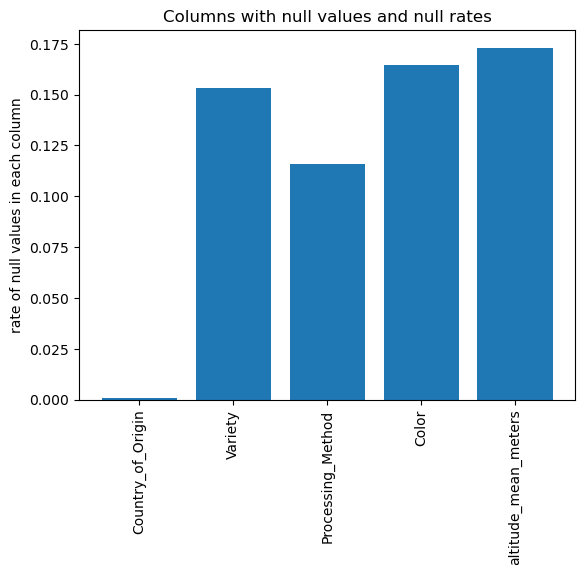

In [145]:
null_columns = [[], []]
for column in cf.columns:
    print('~~~~~~')
    nullrate = cf[column][cf[column].isnull() == True].shape[0]/cf[column].shape[0]
    print(f'the null rate for column: {column} is: {nullrate}')
    if nullrate != 0:
        null_columns[0].append(column)
        null_columns[1].append(nullrate)

plt.bar(null_columns[0], null_columns[1])
plt.title('Columns with null values and null rates')
plt.ylabel('rate of null values in each column')
plt.xticks(null_columns[0], rotation=90)
plt.show()

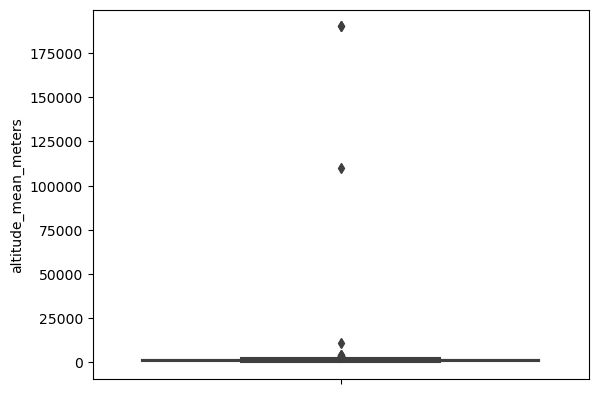

In [63]:
sb.boxplot(data=cf, y='altitude_mean_meters')
plt.show()

since there are obviously some data whose mean altitude is way beyond the range of altitude people can reach, I decided to drop those abnormal data

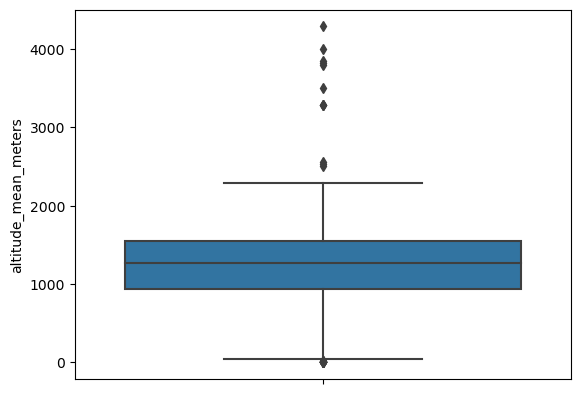

In [153]:
altitude_predicate = cf['altitude_mean_meters'] > 5000
cf = cf[~altitude_predicate]
sb.boxplot(cf, y='altitude_mean_meters')
plt.show()

In [71]:
cf.isnull().sum()

Country_of_Origin         1
Variety                 201
Processing_Method       152
Moisture                  0
unit_of_measurement       0
Color                   216
altitude_mean_meters    227
Total_Cup_Points          0
dtype: int64

drop the rows with null values

In [151]:
cf = cf.dropna(how='any')

In [154]:
cf.shape[0]

901

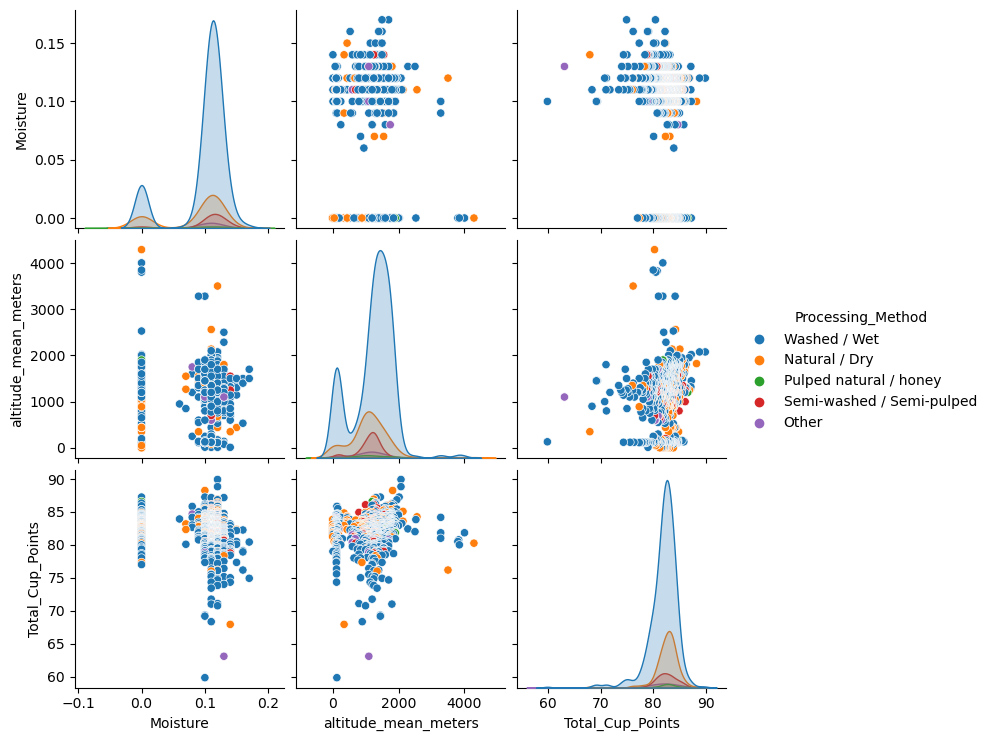

In [76]:

sb.pairplot(data=cf, hue='Processing_Method')
plt.show()

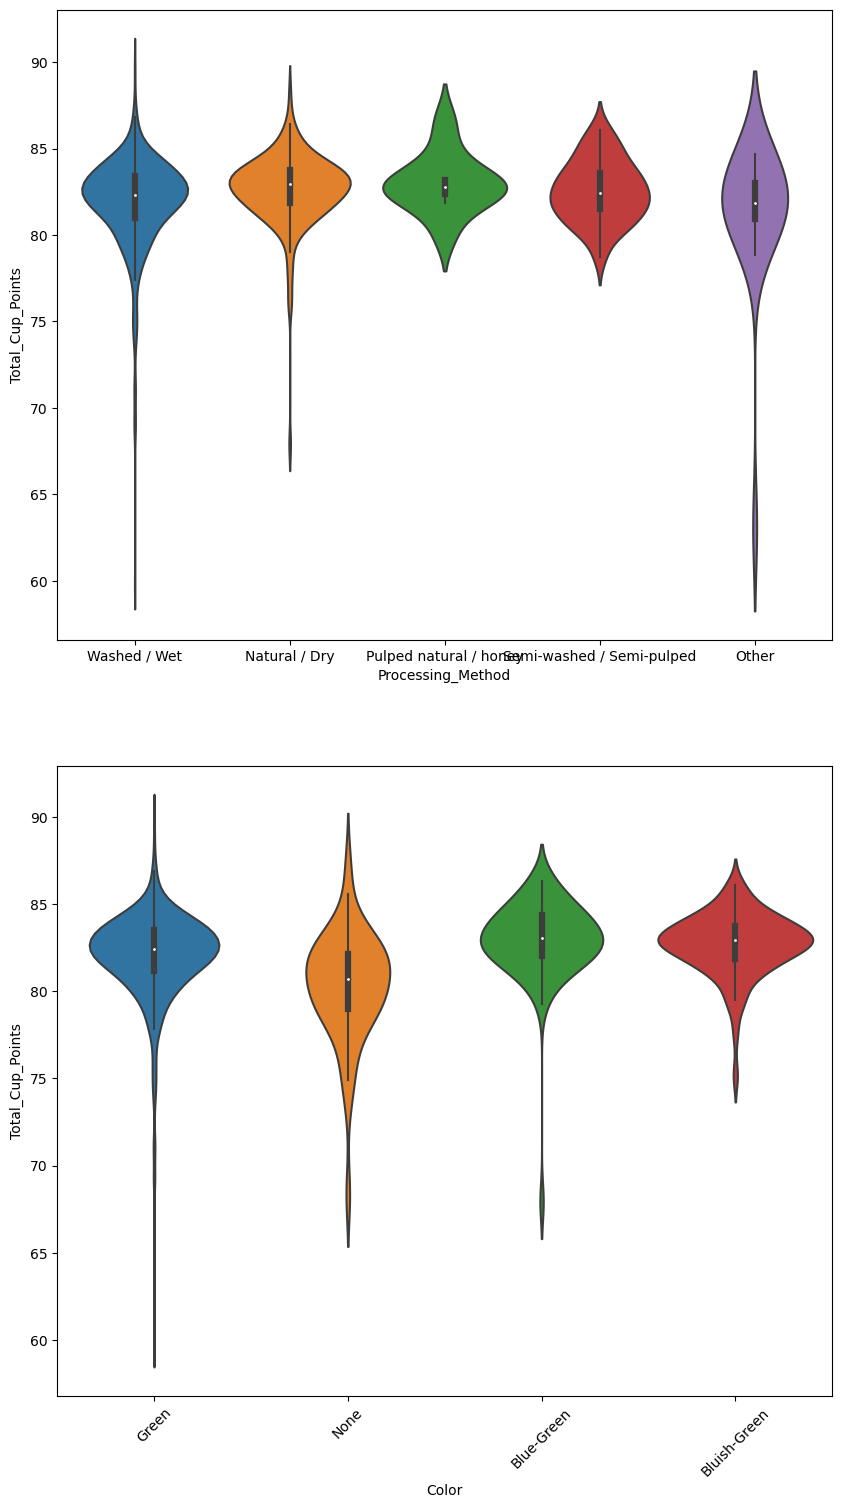

In [85]:
# violin plot
data = ['Processing_Method', 'Color']

fig, axs = plt.subplots(nrows=2, figsize=(10,18))

sb.violinplot(data= cf, x= data[0], y= "Total_Cup_Points", ax= axs[0], palette= "tab10")

sb.violinplot(data= cf, x= data[1], y= "Total_Cup_Points", ax= axs[1], palette= "tab10")
plt.xticks(rotation='45')
plt.show()

<AxesSubplot:xlabel='altitude_mean_meters', ylabel='Total_Cup_Points'>

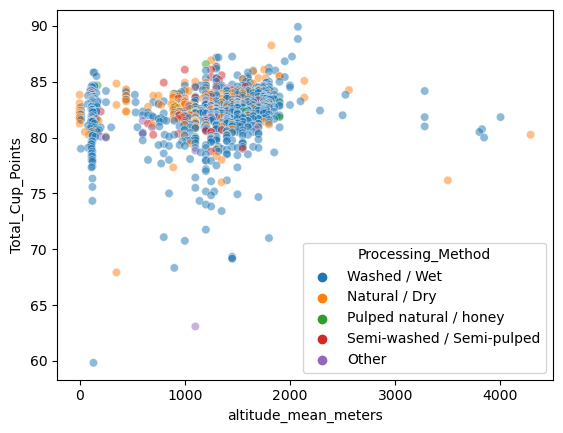

In [96]:
x = cf['altitude_mean_meters']
y = cf['Total_Cup_Points']
sb.scatterplot(cf, x='altitude_mean_meters', y='Total_Cup_Points', hue='Processing_Method',
              alpha=0.5)

In [158]:
cf.corr()

,Moisture,altitude_mean_meters,Total_Cup_Points
Moisture,1.000000,-0.037727,-0.139838
altitude_mean_meters,-0.037727,1.000000,0.132609
Total_Cup_Points,-0.139838,0.132609,1.000000


<AxesSubplot:>

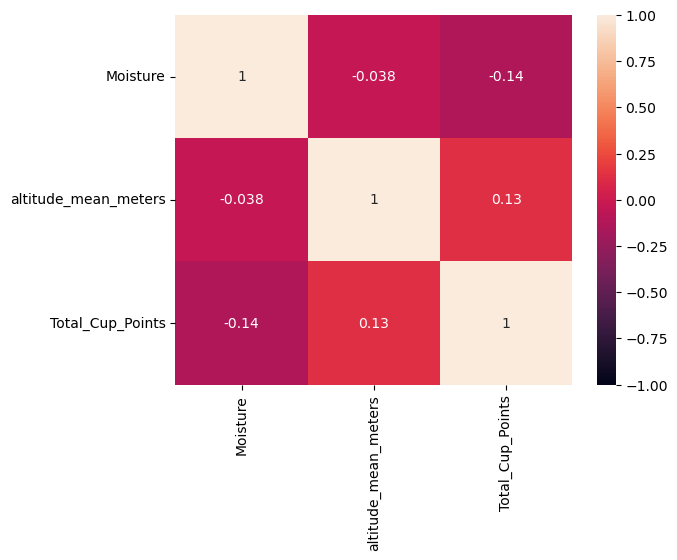

In [159]:
sb.heatmap(cf.corr(), vmin=-1, vmax=1, annot=True)

# Split and Preprocessing

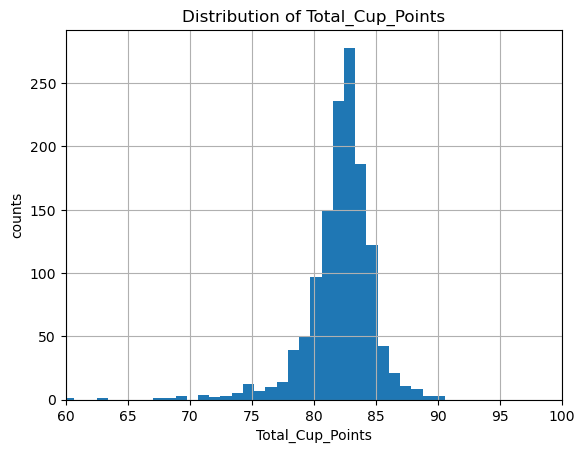

In [135]:
fig = cf['Total_Cup_Points'].hist(bins=100)
fig.set_xlim([60, 100])
plt.title('Distribution of Total_Cup_Points')
plt.xlabel('Total_Cup_Points')
plt.ylabel('counts')
plt.show()

In [122]:
cf.loc[:, cf.columns != 'Total_Cup_Points']

,Country_of_Origin,Variety,Processing_Method,Moisture,unit_of_measurement,Color,altitude_mean_meters
0,Ethiopia,NaN,Washed / Wet,0.12,m,Green,2075.00
1,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.00
2,Guatemala,Bourbon,NaN,0.00,m,NaN,1700.00
3,Ethiopia,NaN,Natural / Dry,0.11,m,Green,2000.00
4,Ethiopia,Other,Washed / Wet,0.12,m,Green,2075.00
...,...,...,...,...,...,...,...
1306,Mexico,Bourbon,Washed / Wet,0.11,m,None,900.00
1307,Haiti,Typica,Natural / Dry,0.14,m,Blue-Green,350.00
1308,Nicaragua,Caturra,Other,0.13,m,Green,1100.00
1309,Guatemala,Catuai,Washed / Wet,0.10,ft,Green,1417.32


In [155]:
seed = 42
n_splits = 4
X = cf.loc[:, cf.columns != 'Total_Cup_Points']
y = cf['Total_Cup_Points']

group = 'Processing_Method'

X_other, X_test,y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state=seed)

KF = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

i=0
for train_index, val_index in KF.split(X_other, y_other):
    X_train = X_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_train = y_other.iloc[train_index]
    y_val = y_other.iloc[val_index]
    i += 1
    print(f'the {i}/{n_splits} split: ')
    print('   training set: ', X_train.shape, y_train.shape)
    print('   validation set: ', X_val.shape, y_val.shape)

    



the 1/4 split: 
   training set:  (540, 7) (540,)
   validation set:  (180, 7) (180,)
the 2/4 split: 
   training set:  (540, 7) (540,)
   validation set:  (180, 7) (180,)
the 3/4 split: 
   training set:  (540, 7) (540,)
   validation set:  (180, 7) (180,)
the 4/4 split: 
   training set:  (540, 7) (540,)
   validation set:  (180, 7) (180,)
